In [27]:

# PROJECT 1: GENERAL EDA


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
gs = pd.read_csv("Global_Superstore(CSV).csv")

print("Shape:", gs.shape)   # rows and columns count
print("Columns:", gs.columns.tolist())   # list of column names
print("\nMissing Values:\n", gs.isnull().sum())   # check for missing values
print("\nDuplicates:", gs.duplicated().sum())      # check for duplicates

Shape: (1000, 24)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

Missing Values:
 Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

Duplicates: 0


In [31]:
# 2. Data Cleaning
gs = gs.drop_duplicates()   # remove duplicate rows
gs["Order Date"] = pd.to_datetime(gs["Order Date"], errors="coerce")  # convert to date type
gs["Ship Date"] = pd.to_datetime(gs["Ship Date"], errors="coerce")

# Fill missing Postal Codes with most common value (mode)
if gs["Postal Code"].isnull().sum() > 0:
    gs["Postal Code"] = gs["Postal Code"].fillna(gs["Postal Code"].mode()[0])

In [33]:
# 4. Outlier Detection (using IQR method)
Q1 = gs["Profit"].quantile(0.25)
Q3 = gs["Profit"].quantile(0.75)
IQR = Q3 - Q1
outliers = gs[(gs["Profit"] < (Q1 - 1.5 * IQR)) | (gs["Profit"] > (Q3 + 1.5 * IQR))]
print("\nNumber of Profit Outliers:", len(outliers))


Number of Profit Outliers: 67


In [35]:
# 3. Statistical Analysis
print("\nDescriptive Statistics:\n", gs[["Sales", "Profit", "Discount", "Quantity"]].describe())

# Correlation (to see relationships between numbers)
print("\nCorrelation Matrix:\n", gs[["Sales", "Profit", "Discount", "Quantity", "Shipping Cost"]].corr())


Descriptive Statistics:
              Sales       Profit     Discount    Quantity
count  1000.000000  1000.000000  1000.000000  1000.00000
mean   1710.971470   288.920440     0.092840     5.55800
std    1259.239238   574.504782     0.148666     2.71846
min       1.910000 -3059.820000     0.000000     1.00000
25%     826.907500    10.037500     0.000000     4.00000
50%    1585.115000   190.685000     0.000000     5.00000
75%    2477.812500   518.872500     0.150000     7.00000
max    9892.740000  4946.370000     0.800000    14.00000

Correlation Matrix:
                   Sales    Profit  Discount  Quantity  Shipping Cost
Sales          1.000000  0.533676 -0.187997  0.555691       0.644891
Profit         0.533676  1.000000 -0.505190  0.154481       0.290593
Discount      -0.187997 -0.505190  1.000000  0.034045      -0.169216
Quantity       0.555691  0.154481  0.034045  1.000000       0.356324
Shipping Cost  0.644891  0.290593 -0.169216  0.356324       1.000000


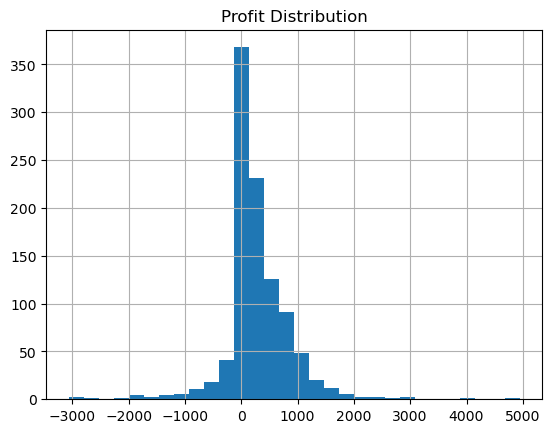

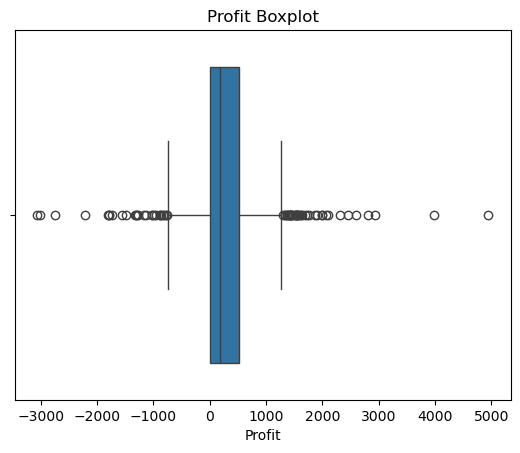

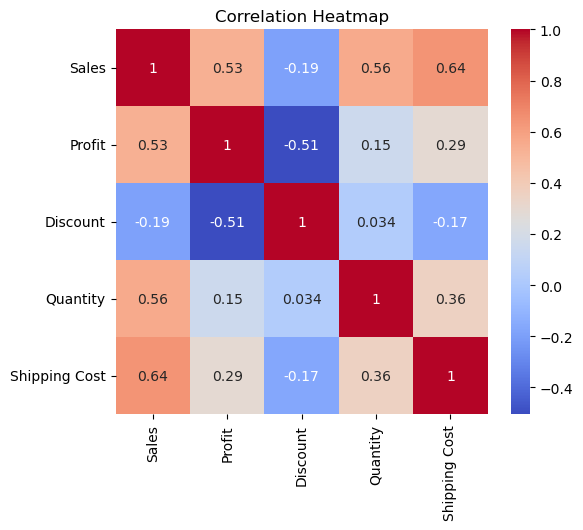

In [39]:
# 5. Visualizations

# Histogram for Profit distribution
gs["Profit"].hist(bins=30)
plt.title("Profit Distribution")
plt.show()

# Boxplot to see outliers visually
sns.boxplot(x=gs["Profit"])
plt.title("Profit Boxplot")
plt.show()


# Heatmap for correlations
plt.figure(figsize=(6,5))
sns.heatmap(gs[["Sales","Profit","Discount","Quantity","Shipping Cost"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [47]:
# PROJECT 2: SALES PERFORMANCE ANALYSIS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# 1. Load dataset
sales = pd.read_csv("sales_data_.csv")

print("Shape:", sales.shape)
print("Columns:", sales.columns.tolist())
print("\nMissing Values:\n", sales.isnull().sum())
print("\nDuplicates:", sales.duplicated().sum())

Shape: (200, 7)
Columns: ['Date', 'Product', 'Category', 'Region', 'Sales', 'Profit', 'Discount']

Missing Values:
 Date        0
Product     0
Category    0
Region      0
Sales       0
Profit      0
Discount    0
dtype: int64

Duplicates: 0


In [57]:
# 2. Data Cleaning
sales = sales.drop_duplicates()
sales["Date"] = pd.to_datetime(sales["Date"], errors="coerce")

# Fill missing values (if any) with median
for col in ["Sales", "Profit", "Discount"]:
    sales[col] = sales[col].fillna(sales[col].median())
    

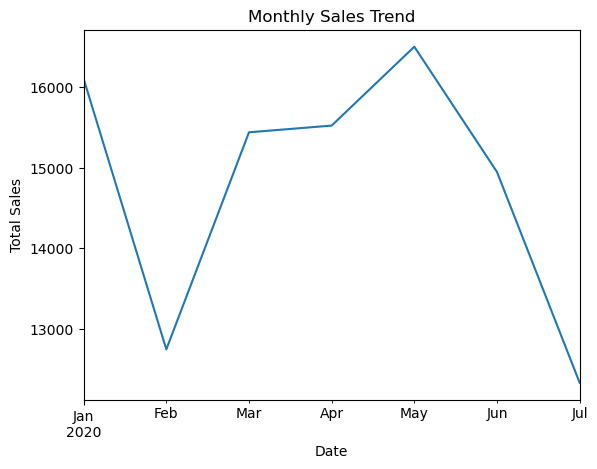

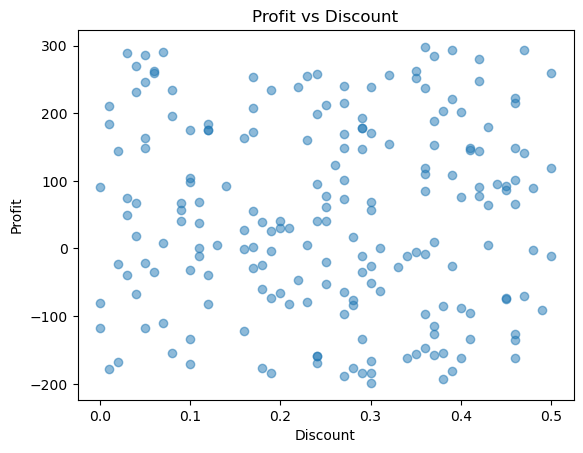

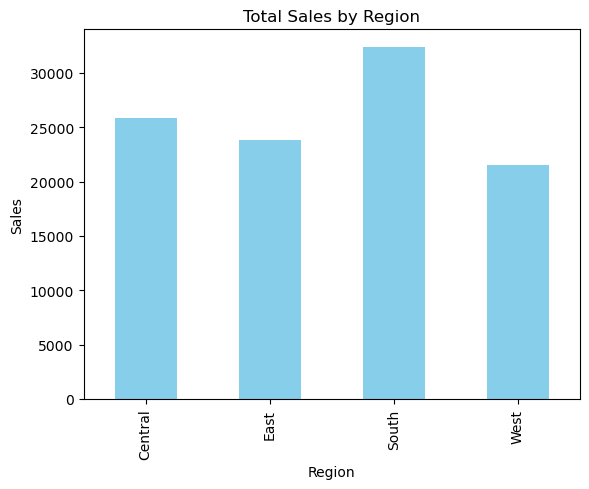

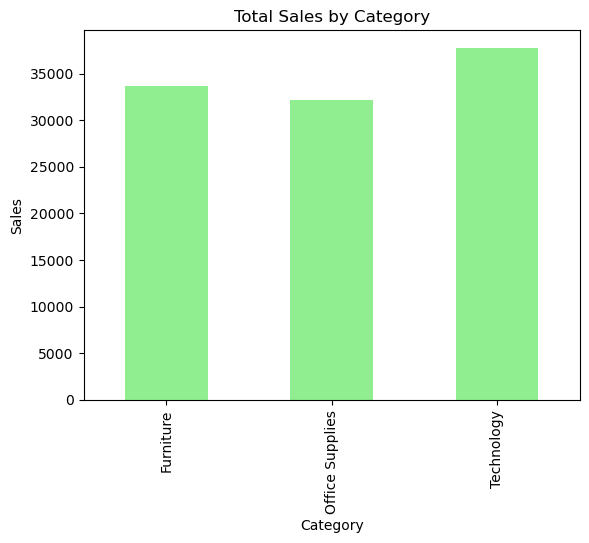

In [53]:
# 3. Exploratory Data Analysis (EDA)

# Sales trend over time (line chart)
sales.set_index("Date")["Sales"].resample("ME").sum().plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()

# Scatter plot: Profit vs Discount
plt.scatter(sales["Discount"], sales["Profit"], alpha=0.5)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Profit vs Discount")
plt.show()

# Bar chart: Sales by Region
sales.groupby("Region")["Sales"].sum().plot(kind="bar", color="skyblue")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

# Bar chart: Sales by Category
sales.groupby("Category")["Sales"].sum().plot(kind="bar", color="lightgreen")
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()

In [55]:
# 4. Predictive Modeling (Linear Regression)

# Features: Profit and Discount ; Target: Sales
X = sales[["Profit", "Discount"]]
y = sales["Sales"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\nModel Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Model Evaluation:
R² Score: -0.0417008310825806
Mean Squared Error: 73793.33021339691
